## **Treina Adaline com Momentum**

In [1]:
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## DECLARAÇÃO DAS FUNÇÕES

#Função de cálculo do ADALINE
def yadaline(W, b, X):
   y = np.dot(W, X) + b
   return y

# Função de treinamento do Adaline
def treina_adaline(W, b, X, yd_p, alfa, maxepocas, tol):
  epoca = 1 #Inicia a contagem de épocas, a variável é um contador que incrementa até o número máximo de épocas
  N = X.shape[1] #Determina a quantidade de amostras a serem treinadas baseado no número de colunas de X
  print(f'N={N}')
  SEQ = tol #Inicializa a soma dos erros quadrados com o valor de tolerância
  vetor_seq = [] #Lista para armazenar a soma dos erros quadrados de cada época
  while ((epoca <= maxepocas) and (SEQ >= tol)): #O treinamento continua até que o erro esteja abaixo da tolerância ou até atingir o número máximo de épocas
    SEQ = 0 #Zera a soma dos erros quadrados no início de cada época
    for i in range(0, N):
      y = yadaline(W, b, X[:,[i]])  #Calcula a saída do adaline, retornando para y apenas um valor
      erro = yd_p[0, i] -y  #Calcula o erro da saída atual em relação à saída desejada. Esse erro é usado para ajustar os pesos usando a regra delta
      W = W + alfa*erro*X[:,i].T  #o ajuste é a taxa de aprendizado alfa vezes o erro calculado, multiplicado pela amostra que gerou o erro. É preciso fazer o transposto para que o cálculo aconteça
      b = b + alfa*erro  #Ajusta o bias usando a regra delta
      SEQ = SEQ + erro[0]**2  #Acumula o erro quadrado para esta amostra. FIM DO FOR
      ### IDEAL CHAMAR A FUNÇÃO MISTURA AQUI ###
    print(f'SEQ = {SEQ[0]} na Epoca {epoca}') #Exibe o erro quadrado acumulado para esta época
    epoca = epoca + 1 #Avança para a próxima época
    vetor_seq.append(SEQ[0]) #Armazena o erro quadrado acumulado desta época. Fim do WHILE
  return W, b, vetor_seq

# Função de treinamento do Adaline com momento
def treina_adaline_momentum(W,b,X,yd,alfa,maxepocas,tol,beta):
  epoca = 1
  N = X.shape[1] # Número de amostras na matriz de dados
  print(f'N = {N}')
  SEQ = tol #Inicializa a soma dos erros quadrados com o valor de tolerância
  vetor_seq = [] #Lista para armazenar a soma dos erros quadrados (SEQ) de cada época
  W_antigo = W
  W_atual = W
  b_antigo = b
  b_atual = b

  while (epoca <= maxepocas and SEQ >= tol):
    SEQ = 0
    for i in range(0,N):
      y = yadaline(W_atual,b_atual,X[:,i])
      erro = yd[0,i] - y

      # Regra delta/Gradiente descendente com momento
      W_futuro = W_atual + alfa * erro * X[0,i].T + beta*(W_atual - W_antigo) # Calcular novos pesos W com momento
      b_futuro = b_atual + alfa * erro + beta*(b_atual - b_antigo) # Calcular novo bias com momento
      W_antigo = W_atual
      b_antigo = b_atual
      W_atual = W_futuro
      b_atual = b_futuro
      SEQ = SEQ + erro[0]**2 # Somatório dos erros quadráticos

    print(f'SEQ = {SEQ[0]} na Epoca {epoca}')
    epoca = epoca + 1
    vetor_seq.append(SEQ[0])
  return [W_futuro,b_futuro,vetor_seq]

def mistura(X,yd):
  p = np.random.permutation(len(X))
  xp,yp = X[p], yd[p]
  return xp,yp


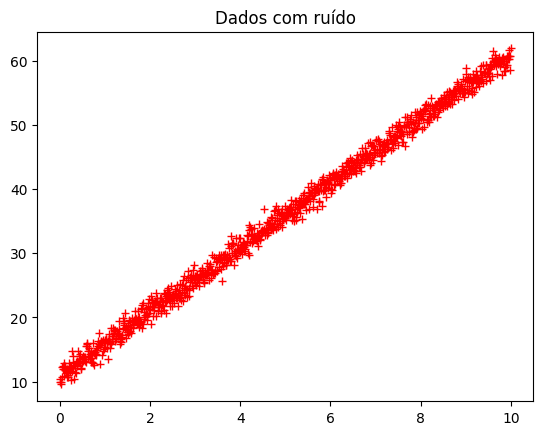

In [3]:
#Criação dos dados X e yd SEM RUÍDO
X = np.linspace(0, 10, 1000)
yd = 5*X + 10

# Parâmetros do ruído
avg_ruido = 1
std_deviation_ruido = 1

# Gera ruído
ruido = np.random.normal(avg_ruido, std_deviation_ruido, yd.shape)
yd = yd + ruido

#Chamada da função mistura
X,yd = mistura(X,yd)

#Redimensionando vetores
X_T = X[np.newaxis]
yd_T = yd[np.newaxis]

#Plota reta de origem e amostras
plt.figure()
plt.title('Dados com ruído')
plt.plot(X,yd,'+',c='r')
plt.show()


In [8]:
X_T.shape

(1, 1000)

In [9]:
yd_T.shape

(1, 1000)

In [4]:
T## DECLARAÇÃO DAS VARIÁVEIS
alfa = 0.0001 # O valor de alfa dita o passo de ajuste dos pesos
maxepocas = 500
tol = 10**-9 # tol é a tolerancia máxima estabelecida para o erro no treinamento

beta = 0.8

W = (np.array(np.random.rand(1 , 1))*2)-1 # Criar variável W com os pesos randômicos entre -1 e 1 (*2-1 é a operação para mover o range do rand de 0 a 1 para -1 a 1)
b = (np.array(np.random.rand(1 , 1))*2)-1 # A variável b é o bias, que tem o objetivo variar a influência das entradas

In [5]:
#Inicia o treinamento do ADALINE com os dados fornecidos

W_adaline_momentum, b_adaline_momentum, vetor_seq_adaline_momentum = treina_adaline_momentum(W, b, X_T, yd_T, alfa, maxepocas, tol, beta)
print(f'Pesos após o treinamento : W = {W_adaline_momentum}, b = {b_adaline_momentum}')  #Exibe os pesos e bias finais após o treinamento

N = 1000
SEQ = 54541.87930390287 na Epoca 1
SEQ = 15965.651858398136 na Epoca 2
SEQ = 12704.12793243815 na Epoca 3
SEQ = 10152.078321298146 na Epoca 4
SEQ = 8155.1779541066535 na Epoca 5
SEQ = 6592.669928038315 na Epoca 6
SEQ = 5370.06397301897 na Epoca 7
SEQ = 4413.423090923175 na Epoca 8
SEQ = 3664.892922954993 na Epoca 9
SEQ = 3079.2035370330823 na Epoca 10
SEQ = 2620.9321221480564 na Epoca 11
SEQ = 2262.3610831881124 na Epoca 12
SEQ = 1981.802029325439 na Epoca 13
SEQ = 1762.284318319709 na Epoca 14
SEQ = 1590.5288612336174 na Epoca 15
SEQ = 1456.1451397657854 na Epoca 16
SEQ = 1351.002884548755 na Epoca 17
SEQ = 1268.7404233322275 na Epoca 18
SEQ = 1204.3799714955035 na Epoca 19
SEQ = 1154.0266034464828 na Epoca 20
SEQ = 1114.6327031204635 na Epoca 21
SEQ = 1083.8136509136064 na Epoca 22
SEQ = 1059.7036023495243 na Epoca 23
SEQ = 1040.842637898737 na Epoca 24
SEQ = 1026.0884602139054 na Epoca 25
SEQ = 1014.5472993018827 na Epoca 26
SEQ = 1005.5198475657761 na Epoca 27
SEQ = 998.45

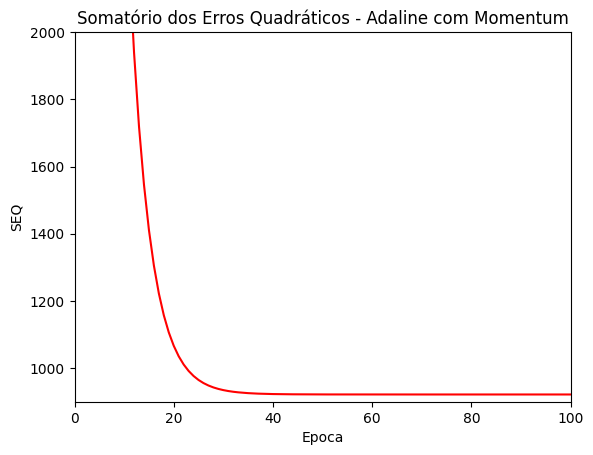

In [ ]:
## Plota SEQ
plt.plot(vetor_seq_adaline_momentum,'r-')
plt.xlim((0,100))
plt.ylim((900,2000))
plt.xlabel('Epoca')
plt.ylabel('SEQ')
plt.title('Somatório dos Erros Quadráticos - Adaline com Momentum')
plt.show()

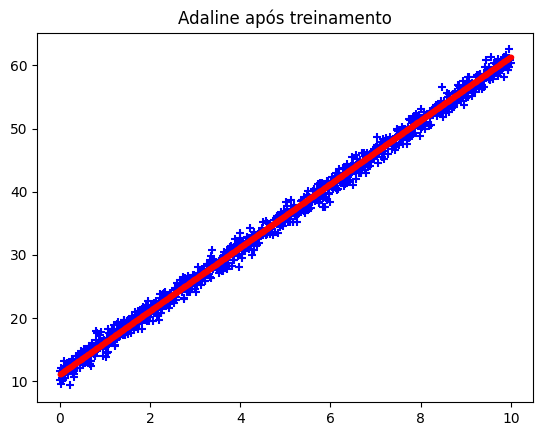

In [ ]:
#Testa ADALINE treinado

y = yadaline(W_adaline_momentum,b_adaline_momentum,X_T)
plt.figure()
plt.scatter(X_T, yd_T, marker='+', color='blue') # Dados de treinamento
plt.plot(X_T,y,"r.") # Dados de teste
plt.title('Adaline após treinamento')
plt.show()



## **Treina Adaline Sem Momento**

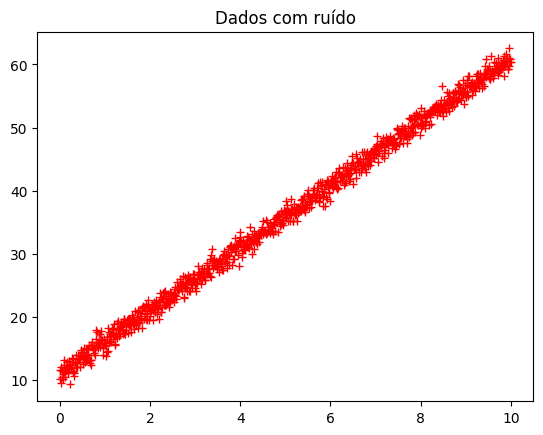

In [ ]:
plt.figure()
plt.title('Dados com ruído')
plt.plot(X,yd,'+',c='r')
plt.show()

In [ ]:
# Treinar dados com ruídos
W, b, vetor_seq = treina_adaline(W, b, X_T, yd_T, alfa, maxepocas, tol)
print(f'Pesos após o treinamento : W = {W}, b = {b}')

N=1000
SEQ = 203873.3199110442 na Epoca 1
SEQ = 20851.498561843287 na Epoca 2
SEQ = 19828.335225079925 na Epoca 3
SEQ = 18928.402878775218 na Epoca 4
SEQ = 18067.99520495001 na Epoca 5
SEQ = 17248.57887118889 na Epoca 6
SEQ = 16468.30914563884 na Epoca 7
SEQ = 15725.319187313666 na Epoca 8
SEQ = 15017.827814870518 na Epoca 9
SEQ = 14344.138844785502 na Epoca 10
SEQ = 13702.637139898185 na Epoca 11
SEQ = 13091.784740168829 na Epoca 12
SEQ = 12510.117174906029 na Epoca 13
SEQ = 11956.239951105415 na Epoca 14
SEQ = 11428.825209589924 na Epoca 15
SEQ = 10926.608540937767 na Epoca 16
SEQ = 10448.385953560899 na Epoca 17
SEQ = 9993.010986664869 na Epoca 18
SEQ = 9559.391961166224 na Epoca 19
SEQ = 9146.489361975007 na Epoca 20
SEQ = 8753.31334536524 na Epoca 21
SEQ = 8378.921365456186 na Epoca 22
SEQ = 8022.415914112047 na Epoca 23
SEQ = 7682.942368840997 na Epoca 24
SEQ = 7359.686943532245 na Epoca 25
SEQ = 7051.874737117385 na Epoca 26
SEQ = 6758.767875476369 na Epoca 27
SEQ = 6479.6637421

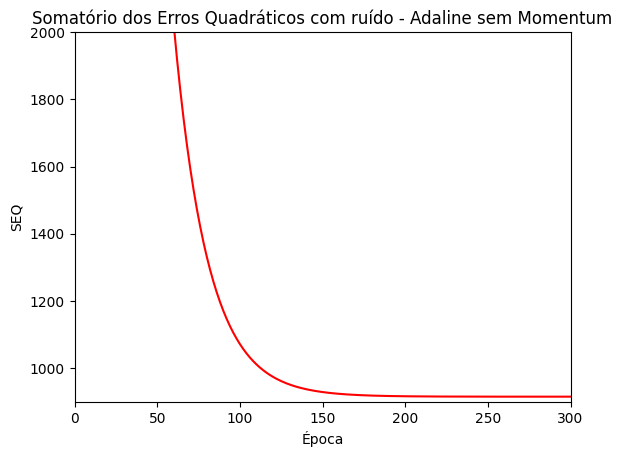

In [ ]:
#Plotar o Somatório dos Erros Quadráticos (SEQ) ao longo das épocas
plt.plot(vetor_seq, 'r-')
plt.xlim((0,300))
plt.ylim((900,2000))
plt.xlabel('Época')
plt.ylabel('SEQ')
plt.title('Somatório dos Erros Quadráticos com ruído - Adaline sem Momentum')
plt.show()

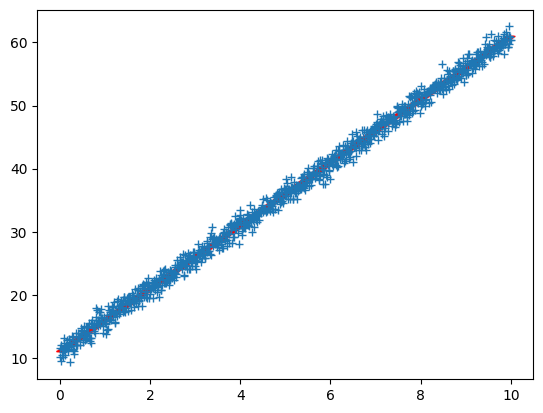

In [ ]:
#Testar o Adaline treinado

y = yadaline(W,b,X_T)

plt.figure()
plt.plot(X_T,y,"r_")
plt.plot(X,yd,"+")
plt.show()